In [1]:
import tensorflow as tf
import numpy as np
import pickle
np.random.seed(7)

In [2]:
with open ('C:\\Users\\Wilfred\\Desktop\\better-of-two\\input_layer_4_6_12_2.pickle','rb') as file:
    input_data = pickle.load(file)
permutation = list(np.random.permutation(input_data.shape[0]))
input_data = input_data[permutation,:]
print(input_data.shape)
x_train = input_data[:100000, :]
x_test = input_data[100000:105000, :]


(105000, 24)


In [3]:
with open ('C:\\Users\\Wilfred\\Desktop\\better-of-two\\output_layer_4_6_12_2.pickle','rb') as file:
    output_data = pickle.load(file)
print(output_data.shape)
#output_data = np.transpose(output_data)
output_data = output_data[permutation,:]
y_train = output_data[:100000, :]
y_test = output_data[100000:105000, :]
print(output_data.shape)

(105000, 12)
(105000, 12)


In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(150, input_shape = [24], activation = 'relu'),
    #tf.keras.layers.Dense(200, activation = 'relu'),
    tf.keras.layers.Dense(150, activation = 'relu'),
    tf.keras.layers.Dense(150, activation = 'relu'),
    tf.keras.layers.Dense(150, activation = 'relu'),
    tf.keras.layers.Dense(12, activation = 'sigmoid')
])
adam = tf.keras.optimizers.Adam(lr = 0.005)
model.compile(optimizer = adam, loss = 'binary_crossentropy', metrics = ['accuracy'])

history = model.fit(x_train, y_train, batch_size = 1024, epochs = 100, verbose = 2, validation_data = (x_test, y_test))


Train on 100000 samples, validate on 5000 samples
Epoch 1/100
100000/100000 - 3s - loss: 0.3640 - accuracy: 0.8520 - val_loss: 0.2712 - val_accuracy: 0.8878
Epoch 2/100
100000/100000 - 2s - loss: 0.2399 - accuracy: 0.8999 - val_loss: 0.2172 - val_accuracy: 0.9085
Epoch 3/100
100000/100000 - 2s - loss: 0.2093 - accuracy: 0.9109 - val_loss: 0.2023 - val_accuracy: 0.9134
Epoch 4/100
100000/100000 - 2s - loss: 0.1967 - accuracy: 0.9160 - val_loss: 0.1907 - val_accuracy: 0.9187
Epoch 5/100
100000/100000 - 2s - loss: 0.1841 - accuracy: 0.9215 - val_loss: 0.1799 - val_accuracy: 0.9237
Epoch 6/100
100000/100000 - 2s - loss: 0.1678 - accuracy: 0.9281 - val_loss: 0.1611 - val_accuracy: 0.9297
Epoch 7/100
100000/100000 - 2s - loss: 0.1492 - accuracy: 0.9337 - val_loss: 0.1417 - val_accuracy: 0.9361
Epoch 8/100
100000/100000 - 2s - loss: 0.1346 - accuracy: 0.9388 - val_loss: 0.1336 - val_accuracy: 0.9395
Epoch 9/100
100000/100000 - 2s - loss: 0.1233 - accuracy: 0.9434 - val_loss: 0.1228 - val_accu

Epoch 77/100
100000/100000 - 2s - loss: 0.0231 - accuracy: 0.9916 - val_loss: 0.0529 - val_accuracy: 0.9835
Epoch 78/100
100000/100000 - 2s - loss: 0.0252 - accuracy: 0.9908 - val_loss: 0.0532 - val_accuracy: 0.9840
Epoch 79/100
100000/100000 - 2s - loss: 0.0225 - accuracy: 0.9920 - val_loss: 0.0489 - val_accuracy: 0.9864
Epoch 80/100
100000/100000 - 2s - loss: 0.0227 - accuracy: 0.9919 - val_loss: 0.0525 - val_accuracy: 0.9847
Epoch 81/100
100000/100000 - 2s - loss: 0.0216 - accuracy: 0.9923 - val_loss: 0.0463 - val_accuracy: 0.9863
Epoch 82/100
100000/100000 - 2s - loss: 0.0212 - accuracy: 0.9924 - val_loss: 0.0529 - val_accuracy: 0.9854
Epoch 83/100
100000/100000 - 2s - loss: 0.0233 - accuracy: 0.9917 - val_loss: 0.0517 - val_accuracy: 0.9846
Epoch 84/100
100000/100000 - 2s - loss: 0.0249 - accuracy: 0.9911 - val_loss: 0.0470 - val_accuracy: 0.9863
Epoch 85/100
100000/100000 - 2s - loss: 0.0216 - accuracy: 0.9922 - val_loss: 0.0515 - val_accuracy: 0.9861
Epoch 86/100
100000/100000 -

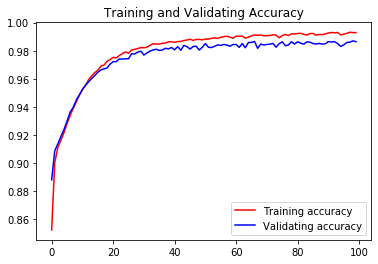

In [6]:
import matplotlib.pyplot as plt
plt.figure()
acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validating accuracy')
plt.title('Training and Validating Accuracy')
#plt.title('Training Accuracy')
plt.legend()
plt.show()

In [8]:
#model.evaluate(x_test, y_test, verbose = 2)

5000/1 - 0s - loss: 0.0630 - accuracy: 0.9720


[0.04715186712741852, 0.9720002]

In [7]:
model.save('C:\\Users\\Wilfred\\Desktop\\weights\\Better_of_Two\\Better_of_Two_4_6_12_2_model.h5')